# Project 1- Test a Perceptual Phenomenon
_Author: Ly Vinh Hung (Tommy) _

## Project summary - Congruent vs Incongruent

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition. The illustration for our words is listed below:

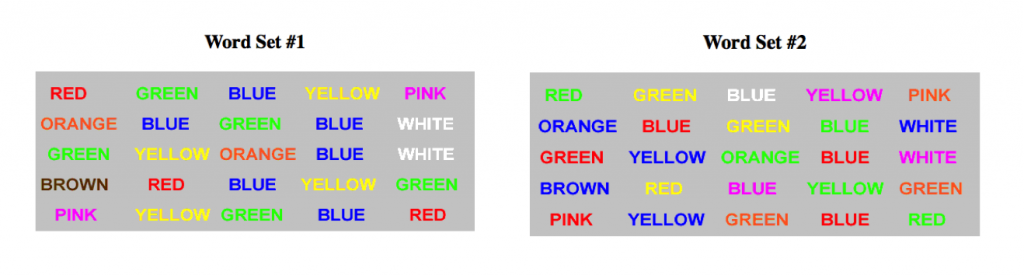

In [28]:
#Add sample image
from IPython.display import Image
PATH = "/Users/tommyly/Documents/Udacity/"
Image(filename = PATH + "StroopImage.png")

In [31]:
#Place dataset in current working directory
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

path = r'~/Documents/Udacity/stroopdata.csv'
dataFrame = pd.read_csv(path)
dataFrame['Participant ID'] = dataFrame.index +1 #Add Participant ID 
dataFrame 

,Congruent,Incongruent,Participant ID
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


##1. Independent & dependent variable

+ Independent variable (not displayed in this data set): Words List, either from congruent or incongruent list.

+ Dependent variable: response time (in seconds) from 24 participants. 

##2. Dependent sample two-tailed t-test

The __dependent samples two-tailed t-test__ is the appropriate methods for this tasks for these following reasons:
+  The dataset does not include population μ and σ. Therefore, we cannot conduct a z-test. 
+  We can compare two means from 2 samples for pre-test period and post-test period, which is the most appropriate task for dependent sample t-Test.
+  We did not randomize 2 samples and gave them different treatment. In short, we do not pay attention to *Between-subject design* and *carry-on effect* but we focus on *Within-subject design*.
+  We are not drawing any conclusion whether response time is faster or slower than the null hypothesis but just recognize there is a different.

__Null Hypothesis__:
$\begin{align}H_{0}& =μ_{i} - μ_{c} = 0\end{align}$

There is no difference in response time between viewing congruent & incongruent words

__Alternative Hypothesis__: 
$\begin{align}H_{A}& =μ_{i} - μ_{c} \neq 0\end{align}$

There is significant difference in the participants response time in viewing congruent words vs incongruent words, regardless the response time is faster or slower than the pre-test period.

_Denotation_: 
+ $μ_{i}$ : mean of incongruent (i) response time

+ $μ_{c}$ : mean of congruent (c) response time

##3. Descriptive statistic

In [9]:
#Separate congruent and incongruent data
congruent = dataFrame['Congruent'] 
incongruent = dataFrame['Incongruent']

In [28]:
#Set up coding for all measurement
#Central tendency
congruent_mean = round(congruent.mean(),2)
incongruent_mean = round(incongruent.mean(),2)
congruent_median = round(congruent.median(),2)
incongruent_median = round(incongruent.median(),2)
#Variability 
congruent_std = round(congruent.std(),2)
incongruent_std = round(incongruent.std(),2)

__Central Tendency Measurement__

In [32]:
#Congruent mean
congruent_mean

14.05

In [21]:
#Incongruent mean
incongruent_mean

22.02

In [26]:
#Congruent median
congruent_median

14.36

In [27]:
#Congruent median
incongruent_median

21.02

__Variability Measurement__

In [29]:
#Congruent median
congruent_std

3.56

In [31]:
#Incongruent median
incongruent_std

4.8

__Summary table__

|Measurement|Congruent    |Incongruent|
|------     |------       |------     |
|Mean       | 14.05       |   22.02   |
|Median     | 14.36       |   21.02   |
|Standard Deviation  | 3.56 | 4.8     |


##4. Data visualisation

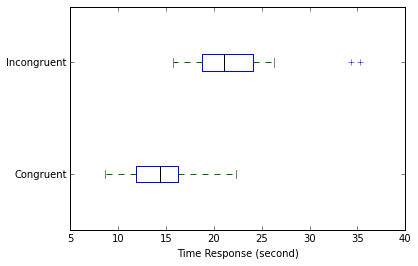

In [67]:
dataFrame.plot(x = 'Participant ID', 
          kind = 'box', 
          vert = False,
          color = dict(boxes = 'Blue', 
                       whiskers = 'DarkGreen', 
                       medians = 'Black',
                       caps = 'Gray')
         ).set_xlabel('Time Response (second)')
plt.show()


__Observation__: Visually speaking, the box plot shows that the mean of incongruent response time may not be within the t-critical from congruent response time. Also, we can also see few outlier from "Incongruent" that could indicate the response time is significant higher if we take more sample sizes.But in order to firmly confirm, we need to conduct proper statistical test as listed below. 

##5. Statistical test & result

__With 90% Confidence Interval__
\begin{align}
\alpha = 0.1 &&
Df = 23&&
t-critical= +1.714, -1.714
\end{align}

In [40]:
#Calculate Point Estimate 
point_estimate = round((incongruent_mean - congruent_mean),2)
point_estimate

7.97

In [52]:
#Calculate Standard Deviation Difference between Congruent & Incongruent using NumPy package
dataFrame['D'] = dataFrame['Incongruent'] - dataFrame['Congruent']
dataFrame['D']
s = round((np.std(dataFrame['D'],ddof = 1, dtype=np.float64)),3)
s

4.865

In [62]:
#Calculate t-statistic with n = 24, point estimate = 7.97 and standard deviation
t = round(point_estimate/(s/math.sqrt(24)),3)
t

8.026

__Result__:

t-statistic = 8.027 > t-critical = 1.714 by a significant amount. Therefore, we __reject the null hypothesis__ that there is no significant difference between response time in these 2 tests. In fact, it maybe took much longer and completely out of the t-table. Intuitively speaking, this result is align with common sense that people take longer time to process information that contradict to their existed perception toward the subject.  